In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix 
from matplotlib import pyplot

In [3]:
dataset= pd.read_csv("/Users/swatilathwal/Downloads/diabetes.csv")


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
x = dataset.iloc[:,:8].values
y = dataset.iloc[:,8:].values

In [8]:
len(x)

768

In [9]:
len(y)

768

In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'], dataset['Outcome'], stratify=dataset['Outcome'], random_state=66)

In [12]:
y_test

506    1
709    1
257    0
518    0
432    0
      ..
143    1
686    0
681    1
510    1
426    0
Name: Outcome, Length: 192, dtype: int64

In [13]:
#Logistic Regression
logreg = LogisticRegression().fit(x_train, y_train)
print("Logistic Regression accuracy - training: {}".format(logreg.score(x_train, y_train)))
print("Logistic Regression accuracy - test: {}".format(logreg.score(x_test, y_test)))

Logistic Regression accuracy - training: 0.78125
Logistic Regression accuracy - test: 0.7708333333333334


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
logreg2 = LogisticRegression(C=100).fit(x_train, y_train)
print("(C=100) Logistic Regression accuracy - training: {}".format(logreg2.score(x_train, y_train)))
print("(C=100) Logistic Regression accuracy - test: {}".format(logreg2.score(x_test, y_test)))

(C=100) Logistic Regression accuracy - training: 0.7847222222222222
(C=100) Logistic Regression accuracy - test: 0.765625


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


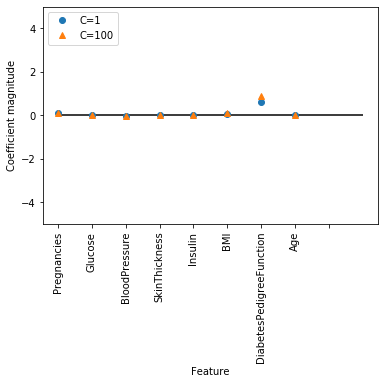

In [15]:
features = [x for i,x in enumerate(dataset.columns) if i!=8]
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg2.coef_.T, '^', label="C=100")
plt.xticks(range(dataset.shape[1]), features, rotation=90)
plt.hlines(0, 0, dataset.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc='upper left')

In [16]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("Decision Tree accuracy - training: {}".format(tree.score(x_train, y_train)))
print("Decision Tree accuracy - test: {}".format(tree.score(x_test, y_test)))

Decision Tree accuracy - training: 0.7725694444444444
Decision Tree accuracy - test: 0.7395833333333334


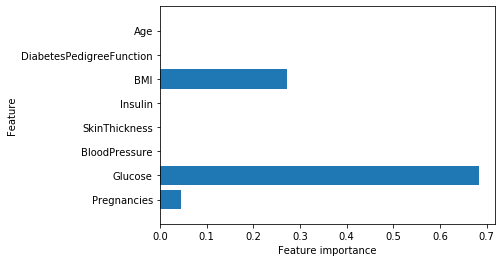

In [17]:
def ImportantFeatures(model):
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
ImportantFeatures(tree)

In [18]:
#KNN
training_accuracy = []
test_accuracy = []

In [19]:
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

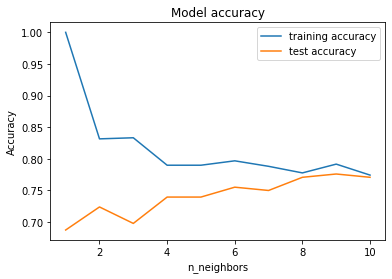

In [20]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title('Model accuracy')
plt.legend()

In [21]:
print('KNN classifier accuracy - training: {}'.format(knn.score(x_train, y_train)))
print('KNN classifier accuracy - test: {}'.format(knn.score(x_test, y_test)))

KNN classifier accuracy - training: 0.7743055555555556
KNN classifier accuracy - test: 0.7708333333333334


In [22]:
#Ramdom Forest 
RandomForest = RandomForestClassifier(n_estimators=100, random_state=0)
RandomForest.fit(x_train, y_train)
print("Random Forest accuracy - training: {}".format(RandomForest.score(x_train, y_train)))
print("Random Forest accuracy - test: {}".format(RandomForest.score(x_test, y_test)))

Random Forest accuracy - training: 1.0
Random Forest accuracy - test: 0.7864583333333334


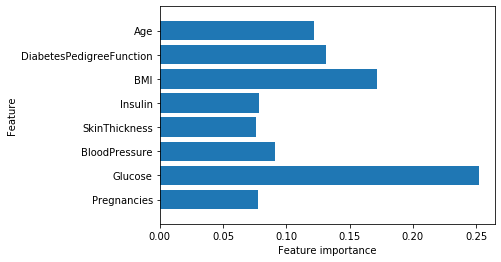

In [23]:
ImportantFeatures(RandomForest)

In [24]:
#Neural Network
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [29]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(2, activation= 'softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=32)

Epoch 1/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 0.6201 - val_loss: 0.6554 - val_accuracy: 0.6320
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6704 - val_loss: 0.6331 - val_accuracy: 0.6450
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6723 - val_loss: 0.6176 - val_accuracy: 0.6494
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6741 - val_loss: 0.6057 - val_accuracy: 0.6537
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.6834 - val_loss: 0.5981 - val_accuracy: 0.6667
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7020 - val_loss: 0.5906 - val_accuracy: 0.6883
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7058 - val_loss: 0.5835 - val_accuracy: 0.7100
Epoch 8/50
17/17 [=

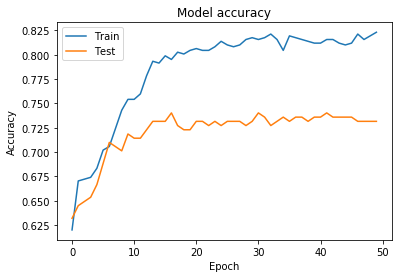

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
acc = history.history['val_accuracy']

In [34]:
print(sum(acc)/len(acc))

0.7204329001903534


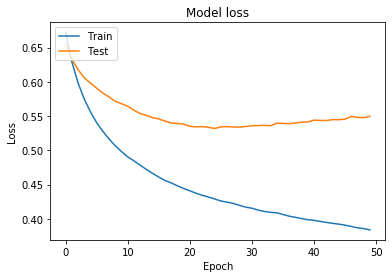

In [35]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()